In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [146]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [147]:
df= pd.read_csv("../../data/processed/oline_merge.csv")
df = df[df.year >= df.draft_yr+3]
# df =df[df.year != 2020]
len(df)

297

In [148]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,year,age,draft_yr,draft_pos,attempts,yards_run,tds_run,longgain_run,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,299.397306,299.397306,2014.754209,27.457912,2009.441077,62.659933,143.498316,604.922559,4.323232,37.451178,...,0.939394,9.696970,28.629630,5.773064,2.154545,16.813131,1.686869,16.932660,17.340067,16.104377
std,164.758086,164.758086,3.545580,2.443776,4.088224,70.662565,96.268176,431.800165,4.129234,20.634000,...,1.247848,7.107459,15.392309,1.758190,1.206257,10.588606,1.561659,9.245279,9.176323,9.157733
min,0.000000,0.000000,2004.000000,22.000000,1999.000000,-1.000000,2.000000,-3.000000,0.000000,3.000000,...,0.000000,0.000000,3.000000,-0.400000,0.100000,-0.300000,0.000000,1.000000,1.000000,1.000000
25%,172.000000,172.000000,2013.000000,26.000000,2007.000000,5.000000,56.000000,240.000000,1.000000,20.000000,...,0.000000,4.000000,18.000000,4.700000,1.200000,8.800000,0.000000,9.000000,10.000000,8.000000
50%,291.000000,291.000000,2015.000000,27.000000,2009.000000,48.000000,134.000000,525.000000,3.000000,34.000000,...,1.000000,8.000000,25.000000,5.800000,2.000000,14.600000,1.000000,17.000000,18.000000,17.000000
75%,446.000000,446.000000,2018.000000,29.000000,2013.000000,77.000000,220.000000,934.000000,6.000000,51.000000,...,1.000000,14.000000,35.000000,6.500000,2.900000,23.400000,3.000000,25.000000,25.000000,24.000000
max,599.000000,599.000000,2020.000000,37.000000,2017.000000,250.000000,392.000000,2097.000000,28.000000,97.000000,...,7.000000,32.000000,80.000000,12.200000,6.300000,58.700000,7.000000,32.000000,32.000000,32.000000


In [149]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

# df = df.drop('yardspergame_run',axis=1)
# df = df.drop('yardsperatt',axis=1)
# df = df.drop('yardspertarget',axis=1)
# df = df.drop('yardsperrec',axis=1)
# df = df.drop('recpergame',axis=1)
# df = df.drop('yardspergame_rec',axis=1)

df = df.drop('yards_run',axis=1)
df = df.drop('yards_rec',axis=1)
df = df.drop('attempts',axis=1)
df = df.drop('rec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)
df = df.drop('yardspergame_run',axis=1)
df = df.drop('tgt',axis=1)

df.describe()


,age,draft_pos,tds_run,longgain_run,yardsperatt,Percenthit (%),g,gs,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,27.457912,62.659933,4.323232,37.451178,4.091919,2.585167,12.582492,7.858586,7.759933,0.939394,9.696970,28.629630,5.773064,1.686869,16.932660,17.340067,16.104377
std,2.443776,70.662565,4.129234,20.634000,0.900789,2.301601,3.859102,5.713326,2.242731,1.247848,7.107459,15.392309,1.758190,1.561659,9.245279,9.176323,9.157733
min,22.000000,-1.000000,0.000000,3.000000,-0.300000,0.100644,1.000000,0.000000,-0.500000,0.000000,0.000000,3.000000,-0.400000,0.000000,1.000000,1.000000,1.000000
25%,26.000000,5.000000,1.000000,20.000000,3.600000,0.829187,10.000000,2.000000,6.500000,0.000000,4.000000,18.000000,4.700000,0.000000,9.000000,10.000000,8.000000
50%,27.000000,48.000000,3.000000,34.000000,4.100000,1.915871,14.000000,7.000000,7.700000,1.000000,8.000000,25.000000,5.800000,1.000000,17.000000,18.000000,17.000000
75%,29.000000,77.000000,6.000000,51.000000,4.600000,3.531786,16.000000,14.000000,8.700000,1.000000,14.000000,35.000000,6.500000,3.000000,25.000000,25.000000,24.000000
max,37.000000,250.000000,28.000000,97.000000,7.700000,11.300813,16.000000,16.000000,19.000000,7.000000,32.000000,80.000000,12.200000,7.000000,32.000000,32.000000,32.000000


In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [90]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [153]:
esv = []
# while True: 
for i in range(50):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(16, activation="relu"))
    
#     model.add(Dense(36, activation="relu"))
#     model.add(Dense(36, activation="relu"))
#     model.add(Dense(36, activation="relu"))
    
    model.add(Dense(random.randint(30,40), activation="relu"))
    model.add(Dense(random.randint(30,40), activation="relu"))
    model.add(Dense(random.randint(30,40), activation="relu"))
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer="sgd", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=50)
    
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .45):
        winsound.Beep(1047, 62)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("AVG: " + str(sum(esv)/len(esv)))
print('\n')
print(esv)
winsound.Beep(784, 62)

Epoch 1/50
8/8 [==============================] - 0s 14ms/step - loss: 10.9743 - val_loss: 7.2531
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 7.5945 - val_loss: 4.5664
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.9776 - val_loss: 4.3597
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.6243 - val_loss: 4.3136
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5588 - val_loss: 4.0322
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2481 - val_loss: 3.9482
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0921 - val_loss: 4.3910
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0020 - val_loss: 3.8692
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1317 - val_loss: 4.7274
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0147 - val_loss: 3.9115
Epoch 11/50
8/8 [====================

8/8 [==============================] - 0s 5ms/step - loss: 3.6209 - val_loss: 3.0478
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6113 - val_loss: 2.9861
Epoch 29/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4758 - val_loss: 3.0084
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6539 - val_loss: 2.9315
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4748 - val_loss: 3.5585
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8040 - val_loss: 3.9345
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7113 - val_loss: 3.2245
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3500 - val_loss: 3.9885
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5778 - val_loss: 3.7673
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5488 - val_loss: 3.0383
Epoch 37/50
8/8 [=========================



ESV: 0.3483136048270008



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.4148 - val_loss: 5.6542
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.0988 - val_loss: 4.0647
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 4.9649 - val_loss: 3.9293
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.8100 - val_loss: 3.8754
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.6342 - val_loss: 3.7399
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5130 - val_loss: 3.7249
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3397 - val_loss: 4.2543
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1311 - val_loss: 5.0398
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2914 - val_loss: 3.6271
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0280 - val_loss: 3.6151
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 3.6957 - val_loss: 3.9222
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6493 - val_loss: 3.6697
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8019 - val_loss: 3.2934
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6493 - val_loss: 3.7898
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4746 - val_loss: 3.0655
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5319 - val_loss: 4.4498
Epoch 33/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6361 - val_loss: 3.2145
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5181 - val_loss: 4.2195
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4003 - val_loss: 3.2236
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5020 - val_loss: 2.9637
Epoch 37/50
8/8 [=========================



ESV: 0.2114796724621495



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.2019 - val_loss: 5.4108
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 5.6434 - val_loss: 4.1252
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 4.8441 - val_loss: 4.0844
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7015 - val_loss: 5.2056
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3527 - val_loss: 3.7081
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2671 - val_loss: 3.6773
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3636 - val_loss: 3.5927
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0493 - val_loss: 4.1929
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9449 - val_loss: 4.9441
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9667 - val_loss: 3.6610
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 3.3585 - val_loss: 3.7785
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6380 - val_loss: 3.7737
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.4161 - val_loss: 3.3608
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7285 - val_loss: 3.8797
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6100 - val_loss: 3.5230
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5397 - val_loss: 7.8711
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6221 - val_loss: 3.2915
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3568 - val_loss: 3.6674
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6638 - val_loss: 3.9107
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6911 - val_loss: 3.4273
Epoch 37/50
8/8 [=========================



ESV: 0.2021170073339007



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 11.0073 - val_loss: 7.0311
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 7.5805 - val_loss: 4.6620
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 5.3464 - val_loss: 4.0336
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7532 - val_loss: 4.0584
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5147 - val_loss: 4.4226
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4068 - val_loss: 4.1249
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2441 - val_loss: 3.8689
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1057 - val_loss: 4.8207
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0601 - val_loss: 3.7137
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0552 - val_loss: 3.5219
Epoch 11

8/8 [==============================] - 0s 5ms/step - loss: 3.7135 - val_loss: 3.7980
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5369 - val_loss: 3.2327
Epoch 29/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5093 - val_loss: 3.2304
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7543 - val_loss: 3.4437
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7622 - val_loss: 3.2949
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4617 - val_loss: 3.0930
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4938 - val_loss: 6.1860
Epoch 34/50
8/8 [==============================] - 0s 3ms/step - loss: 3.7389 - val_loss: 3.2221
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3826 - val_loss: 3.2328
Epoch 36/50
8/8 [==============================] - 0s 3ms/step - loss: 3.4506 - val_loss: 3.5732
Epoch 37/50
8/8 [=========================



ESV: 0.3660642111138269



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 9.6268 - val_loss: 3.9600
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 4.5481 - val_loss: 3.9117
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4420 - val_loss: 3.6799
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1642 - val_loss: 3.6623
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1297 - val_loss: 3.7439
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9694 - val_loss: 3.9800
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0025 - val_loss: 3.5340
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1254 - val_loss: 3.5322
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0510 - val_loss: 4.4786
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9781 - val_loss: 3.5289
Epoch 11/

8/8 [==============================] - 0s 4ms/step - loss: 3.6259 - val_loss: 3.4345
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6587 - val_loss: 3.3494
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8003 - val_loss: 3.2514
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6437 - val_loss: 3.4104
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9341 - val_loss: 3.2293
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6035 - val_loss: 4.7236
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8047 - val_loss: 3.2525
Epoch 34/50
8/8 [==============================] - 0s 3ms/step - loss: 3.3834 - val_loss: 6.2957
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4779 - val_loss: 6.9441
Epoch 36/50
8/8 [==============================] - 0s 3ms/step - loss: 3.5064 - val_loss: 3.4992
Epoch 37/50
8/8 [=========================



ESV: 0.18876270733733636



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.6668 - val_loss: 5.8240
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.2110 - val_loss: 4.1210
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 5.0083 - val_loss: 3.9512
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 4.7205 - val_loss: 4.3509
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 4.6371 - val_loss: 3.8066
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4889 - val_loss: 3.8679
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5763 - val_loss: 6.3991
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4001 - val_loss: 4.2740
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2436 - val_loss: 3.6556
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0390 - val_loss: 4.1647
Epoch 1

Epoch 27/50
8/8 [==============================] - 0s 3ms/step - loss: 3.7738 - val_loss: 3.4547
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7427 - val_loss: 4.6063
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6901 - val_loss: 5.9083
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7113 - val_loss: 4.2177
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5136 - val_loss: 4.2616
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6185 - val_loss: 3.2908
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7449 - val_loss: 4.0822
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7688 - val_loss: 3.3478
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6761 - val_loss: 3.7107
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8428 - val_loss: 4.2856
Epoch 37/50
8/8 [=============



ESV: 0.20150003061361188



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.5079 - val_loss: 5.9833
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.3658 - val_loss: 4.2184
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 5.0796 - val_loss: 4.0758
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.8402 - val_loss: 4.5140
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.6567 - val_loss: 3.8932
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 4.4667 - val_loss: 3.8804
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3718 - val_loss: 3.7525
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2763 - val_loss: 3.9872
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3869 - val_loss: 3.8303
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1646 - val_loss: 4.0471
Epoch 1

8/8 [==============================] - 0s 4ms/step - loss: 3.5902 - val_loss: 3.3587
Epoch 25/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7101 - val_loss: 3.5917
Epoch 26/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6193 - val_loss: 3.3859
Epoch 27/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7018 - val_loss: 3.4911
Epoch 28/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8275 - val_loss: 3.3373
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6322 - val_loss: 3.3475
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6365 - val_loss: 3.4194
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8890 - val_loss: 4.3301
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4731 - val_loss: 6.3624
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8104 - val_loss: 4.5258
Epoch 34/50
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 3.5528 - val_loss: 2.9517


ESV: 0.3798570531243458



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 9.5655 - val_loss: 5.0046
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 5.4385 - val_loss: 4.3888
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.9321 - val_loss: 4.2882
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7947 - val_loss: 4.1668
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.6914 - val_loss: 4.1915
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 4.5521 - val_loss: 4.3418
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4595 - val_loss: 4.0780
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 4.3071 - val_loss: 5.2077
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1724 - val_loss: 4.1115
Epoch 10/50
8/8 [====

8/8 [==============================] - 0s 4ms/step - loss: 4.0932 - val_loss: 3.3927
Epoch 19/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8742 - val_loss: 4.3804
Epoch 20/50
8/8 [==============================] - 0s 3ms/step - loss: 3.9481 - val_loss: 3.3285
Epoch 21/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9879 - val_loss: 3.3332
Epoch 22/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6576 - val_loss: 5.5441
Epoch 23/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0863 - val_loss: 3.2337
Epoch 24/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5598 - val_loss: 4.3126
Epoch 25/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9563 - val_loss: 3.2342
Epoch 26/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5882 - val_loss: 3.5470
Epoch 27/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5617 - val_loss: 3.4874
Epoch 28/50
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 3.6270 - val_loss: 2.9426
Epoch 45/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6566 - val_loss: 2.9608
Epoch 46/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5601 - val_loss: 2.8008
Epoch 47/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8380 - val_loss: 2.9278
Epoch 48/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7350 - val_loss: 2.8018
Epoch 49/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5143 - val_loss: 2.7790
Epoch 50/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5804 - val_loss: 2.7461


ESV: 0.39874949011875294



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.5356 - val_loss: 6.1848
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.6125 - val_loss: 4.4387
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 5.2069 - val_loss: 5.3319
Epoch 4/50
8/

8/8 [==============================] - 0s 4ms/step - loss: 4.0013 - val_loss: 3.7144
Epoch 13/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8870 - val_loss: 3.4085
Epoch 14/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1985 - val_loss: 3.2402
Epoch 15/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8067 - val_loss: 3.3736
Epoch 16/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8162 - val_loss: 3.3402
Epoch 17/50
8/8 [==============================] - 0s 3ms/step - loss: 3.7680 - val_loss: 3.4336
Epoch 18/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7452 - val_loss: 5.9261
Epoch 19/50
8/8 [==============================] - 0s 3ms/step - loss: 3.9959 - val_loss: 3.5385
Epoch 20/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8612 - val_loss: 3.2888
Epoch 21/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8288 - val_loss: 4.0023
Epoch 22/50
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 3.7806 - val_loss: 2.8464
Epoch 39/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1529 - val_loss: 6.3116
Epoch 40/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1892 - val_loss: 2.8788
Epoch 41/50
8/8 [==============================] - 0s 3ms/step - loss: 3.4072 - val_loss: 3.5056
Epoch 42/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0108 - val_loss: 2.9504
Epoch 43/50
8/8 [==============================] - 0s 3ms/step - loss: 3.1438 - val_loss: 4.3229
Epoch 44/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8061 - val_loss: 3.8327
Epoch 45/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1919 - val_loss: 2.8961
Epoch 46/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6962 - val_loss: 2.9658
Epoch 47/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0851 - val_loss: 2.9916
Epoch 48/50
8/8 [=========================

Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 5.0424 - val_loss: 4.1315
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 4.8016 - val_loss: 4.1894
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5933 - val_loss: 3.8437
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4346 - val_loss: 4.3623
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2820 - val_loss: 4.2480
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2882 - val_loss: 3.5762
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 4.1465 - val_loss: 3.5149
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: 4.0645 - val_loss: 3.4083
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9451 - val_loss: 3.5744
Epoch 13/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8874 - val_loss: 3.4391
Epoch 14/50
8/8 [===================

8/8 [==============================] - 0s 4ms/step - loss: 3.5956 - val_loss: 3.2379
Epoch 31/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6603 - val_loss: 3.1128
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1409 - val_loss: 3.1190
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6851 - val_loss: 3.5089
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6914 - val_loss: 3.0748
Epoch 35/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6501 - val_loss: 3.0643
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9292 - val_loss: 4.4620
Epoch 37/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8461 - val_loss: 3.0386
Epoch 38/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7212 - val_loss: 3.7254
Epoch 39/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6266 - val_loss: 3.1647
Epoch 40/50
8/8 [=========================



ESV: 0.29793903387964704



Epoch 1/50
8/8 [==============================] - 0s 14ms/step - loss: 9.0383 - val_loss: 4.1553
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 5.1251 - val_loss: 4.2301
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.9669 - val_loss: 3.8423
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7823 - val_loss: 3.7366
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7091 - val_loss: 3.7949
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.6948 - val_loss: 4.1920
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3735 - val_loss: 3.4859
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3072 - val_loss: 5.9348
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2553 - val_loss: 3.2946
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9747 - val_loss: 4.4457
Epoch 11

Epoch 23/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8837 - val_loss: 3.3844
Epoch 24/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8198 - val_loss: 8.7710
Epoch 25/50
8/8 [==============================] - 0s 4ms/step - loss: 4.7351 - val_loss: 3.4757
Epoch 26/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6889 - val_loss: 3.3290
Epoch 27/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1368 - val_loss: 3.3105
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6286 - val_loss: 3.5895
Epoch 29/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6592 - val_loss: 3.2970
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6629 - val_loss: 3.3610
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7215 - val_loss: 3.5451
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5418 - val_loss: 3.3978
Epoch 33/50
8/8 [=============

8/8 [==============================] - 0s 4ms/step - loss: 3.0389 - val_loss: 5.9698
Epoch 50/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9573 - val_loss: 2.9891


ESV: 0.34740948734038846



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 9.0223 - val_loss: 4.3742
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 4.9687 - val_loss: 4.1773
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.8110 - val_loss: 3.9629
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5349 - val_loss: 3.8813
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3627 - val_loss: 3.9119
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3068 - val_loss: 3.6768
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 4.3354 - val_loss: 3.5800
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 4.2275 - val_loss: 3.5409
Epoch 9/50
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 3.8467 - val_loss: 3.3176
Epoch 18/50
8/8 [==============================] - 0s 3ms/step - loss: 3.9904 - val_loss: 4.2644
Epoch 19/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6565 - val_loss: 5.9608
Epoch 20/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9381 - val_loss: 2.9653
Epoch 21/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6121 - val_loss: 3.4311
Epoch 22/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5630 - val_loss: 3.8932
Epoch 23/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7838 - val_loss: 3.5595
Epoch 24/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5608 - val_loss: 3.2707
Epoch 25/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8082 - val_loss: 5.8379
Epoch 26/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9396 - val_loss: 3.3073
Epoch 27/50
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 2.8770 - val_loss: 4.5842
Epoch 44/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0470 - val_loss: 7.7370
Epoch 45/50
8/8 [==============================] - 0s 3ms/step - loss: 4.1996 - val_loss: 4.7668
Epoch 46/50
8/8 [==============================] - 0s 3ms/step - loss: 3.1162 - val_loss: 3.1156
Epoch 47/50
8/8 [==============================] - 0s 4ms/step - loss: 2.9159 - val_loss: 4.7849
Epoch 48/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5363 - val_loss: 7.1517
Epoch 49/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7091 - val_loss: 3.2804
Epoch 50/50
8/8 [==============================] - 0s 4ms/step - loss: 2.9934 - val_loss: 3.1027


ESV: 0.3245684670727397



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 9.3557 - val_loss: 4.3976
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 5.1444 - val_loss: 3.9115
Epoch 3/50
8/8

8/8 [==============================] - 0s 3ms/step - loss: 4.2373 - val_loss: 3.8111
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0653 - val_loss: 4.1620
Epoch 13/50
8/8 [==============================] - 0s 3ms/step - loss: 4.5008 - val_loss: 4.0916
Epoch 14/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0777 - val_loss: 4.2060
Epoch 15/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2042 - val_loss: 3.7392
Epoch 16/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0951 - val_loss: 3.6573
Epoch 17/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9265 - val_loss: 4.5992
Epoch 18/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9512 - val_loss: 3.7046
Epoch 19/50
8/8 [==============================] - 0s 3ms/step - loss: 3.7915 - val_loss: 4.0504
Epoch 20/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8358 - val_loss: 3.6568
Epoch 21/50
8/8 [=========================

8/8 [==============================] - 0s 4ms/step - loss: 3.1626 - val_loss: 6.2256
Epoch 38/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8507 - val_loss: 3.3074
Epoch 39/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1512 - val_loss: 3.2201
Epoch 40/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5053 - val_loss: 4.0837
Epoch 41/50
8/8 [==============================] - 0s 3ms/step - loss: 3.1904 - val_loss: 6.8142
Epoch 42/50
8/8 [==============================] - 0s 3ms/step - loss: 3.3227 - val_loss: 3.4128
Epoch 43/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1566 - val_loss: 3.9365
Epoch 44/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5053 - val_loss: 3.1971
Epoch 45/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3470 - val_loss: 3.2194
Epoch 46/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0625 - val_loss: 6.2968
Epoch 47/50
8/8 [=========================

8/8 [==============================] - 0s 3ms/step - loss: 4.6893 - val_loss: 4.1876
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5032 - val_loss: 4.9184
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 4.4649 - val_loss: 4.8836
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2903 - val_loss: 4.1308
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 4.2467 - val_loss: 3.9512
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2333 - val_loss: 3.8869
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: 4.1716 - val_loss: 3.8159
Epoch 12/50
8/8 [==============================] - 0s 3ms/step - loss: 4.0439 - val_loss: 3.7453
Epoch 13/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2332 - val_loss: 3.7745
Epoch 14/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0058 - val_loss: 3.6969
Epoch 15/50
8/8 [=============================

8/8 [==============================] - 0s 4ms/step - loss: 3.6053 - val_loss: 2.8593
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.2928 - val_loss: 3.1802
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.2954 - val_loss: 2.9915
Epoch 34/50
8/8 [==============================] - 0s 3ms/step - loss: 3.9663 - val_loss: 2.9029
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2.616 - 0s 3ms/step - loss: 3.6074 - val_loss: 2.8802
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4971 - val_loss: 3.4235
Epoch 37/50
8/8 [==============================] - 0s 4ms/step - loss: 3.2246 - val_loss: 3.3379
Epoch 38/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3603 - val_loss: 3.0161
Epoch 39/50
8/8 [==============================] - 0s 4ms/step - loss: 3.1930 - val_loss: 2.8891
Epoch 40/50
8/8 [==============================] - 0s 4ms/step - loss: 3.2417 - val_loss: 2.9533
Epoch 41/50
8/8 [=



ESV: -0.1932410429913094



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 7.3090 - val_loss: 4.4391
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 4.8157 - val_loss: 4.3540
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 4.7031 - val_loss: 5.9837
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 4.5417 - val_loss: 4.1988
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 4.4193 - val_loss: 4.5176
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 4.2199 - val_loss: 4.2620
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.2552 - val_loss: 4.0676
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1269 - val_loss: 4.7652
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 4.3198 - val_loss: 5.4536
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0933 - val_loss: 3.8645
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 3.8946 - val_loss: 3.5416
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0973 - val_loss: 6.1799
Epoch 29/50
8/8 [==============================] - 0s 3ms/step - loss: 3.8524 - val_loss: 3.1588
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5047 - val_loss: 4.4440
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5656 - val_loss: 3.1766
Epoch 32/50
8/8 [==============================] - 0s 3ms/step - loss: 3.6204 - val_loss: 3.3950
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6657 - val_loss: 3.2789
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5540 - val_loss: 5.8688
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.8750 - val_loss: 3.1571
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4072 - val_loss: 4.6875
Epoch 37/50
8/8 [=========================



ESV: 0.33396980307226365



Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 10.6492 - val_loss: 6.1960
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.4279 - val_loss: 4.1059
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 4.8892 - val_loss: 4.1543
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 4.8325 - val_loss: 3.9446
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 4.6400 - val_loss: 3.8162
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3658 - val_loss: 3.6015
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 4.3580 - val_loss: 3.8786
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.1599 - val_loss: 3.5599
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0454 - val_loss: 3.4217
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 4.0624 - val_loss: 3.3154
Epoch 1

8/8 [==============================] - 0s 4ms/step - loss: 3.6434 - val_loss: 3.4585
Epoch 28/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6774 - val_loss: 3.6653
Epoch 29/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6050 - val_loss: 3.3687
Epoch 30/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7529 - val_loss: 3.9229
Epoch 31/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7585 - val_loss: 3.3247
Epoch 32/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5600 - val_loss: 3.2419
Epoch 33/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5296 - val_loss: 3.3386
Epoch 34/50
8/8 [==============================] - 0s 4ms/step - loss: 3.9137 - val_loss: 3.1857
Epoch 35/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3888 - val_loss: 3.0687
Epoch 36/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5727 - val_loss: 7.1517
Epoch 37/50
8/8 [=========================



ESV: -0.16291513144459602





MAX: 0.4176406023973702
AVG: 0.2699005856288998


[0.4176406023973702, 0.39874949011875294, 0.3951410240803743, 0.39200695673122143, 0.3897242625530074, 0.3798570531243458, 0.37851977773623635, 0.3784971979586289, 0.3741536500712018, 0.367787121464758, 0.3660642111138269, 0.36532007969121916, 0.3596003385237935, 0.3570542753924917, 0.3483136048270008, 0.34740948734038846, 0.3467471390786019, 0.33837072602561946, 0.336235518950325, 0.335264046513591, 0.33403275124457443, 0.33396980307226365, 0.3245684670727397, 0.3244940575473124, 0.3153611084517244, 0.30832720254901724, 0.3059626496577408, 0.30196374552008887, 0.29793903387964704, 0.2934892411885578, 0.29086591137411477, 0.29016531406017754, 0.2855573608555422, 0.2852854165378752, 0.2569544599949345, 0.23969339841409898, 0.2393018001605013, 0.21437188671170293, 0.2114796724621495, 0.2021170073339007, 0.20150003061361188, 0.18876270733733636, 0.18589578512318772, 0.18214844743506142, 0.14706901413989704,

In [117]:
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  3.3393155533477126
RMSE:  1.8273794223826951
MAE:  1.3071420583024833
ESV:  0.4099647629304337


Text(0, 0.5, 'real')

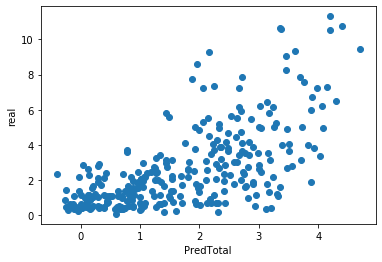

In [118]:
X_scl = scaler.fit_transform(X)
predTotal = model.predict(X_scl)
plt.scatter(predTotal,y)
plt.xlabel("PredTotal")
plt.ylabel('real')

In [119]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    print(model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
[[1.8760607]]
Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
[[3.0334983]]
Gus Edwards
[ 26  -1 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
[[0.64211255]]
James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
[[0.1710788]]
Todd Gurley
[ 27  10 195 678   9  35  15  15  35  25 164   0   7  26   2  24  28  27]
[[2.6247954]]
Frank Gore
[ 38  65 187 653   2  17  15  14  19  16  89   0   3   9   1  31  31  25]
[[1.3391302]]
Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
[[0.7113606]]


In [114]:
# model.save('./savedmodels/April22-norookie-esv41')

INFO:tensorflow:Assets written to: ./savedmodels/April22-norookie-esv41\assets
